In [ ]:
'''
Use logistic regression to build a model to classify the breast cancer dataset Divide the dataset
into training and testing in the ratio 70:30 . Print the confusion matrix, sensitivity, specificity. For
each iteration of training, store the training and testing accuracy. Plot a graph showing training
and testing accuracy Vs iteration no. Do not use sklearn logistic function.
'''

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [17]:
data = load_breast_cancer()
X = data.data
y = data.target
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [18]:
X = np.c_[np.ones(X.shape[0]), X]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [21]:
def cost_function(X, y, theta):
    m = len(y)
    print(m)
    h = sigmoid(np.dot(X, theta))
    cost = - (1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost


In [22]:
def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    cost_history = []
    for _ in range(num_iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = (1 / m) * np.dot(X.T, (h - y))
        theta -= learning_rate * gradient
        cost = cost_function(X, y, theta)
        cost_history.append(cost)
    return theta, cost_history

In [23]:
theta = np.zeros(X_train.shape[1])

In [24]:
learning_rate = 0.01
num_iterations = 1000

In [25]:
theta, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, num_iterations)

398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398
398


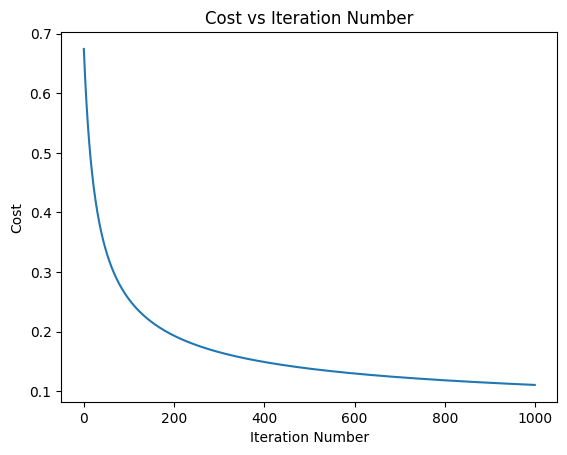

In [26]:
plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iteration Number')
plt.ylabel('Cost')
plt.title('Cost vs Iteration Number')
plt.show()

In [27]:
def predict(X, theta, threshold=0.5):
    probabilities = sigmoid(np.dot(X, theta))
    return (probabilities >= threshold).astype(int)

In [28]:
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN

In [29]:
def sensitivity(TP, FN):
    return TP / (TP + FN)

In [30]:
def specificity(TN, FP):
    return TN / (TN + FP)

In [31]:
train_predictions = predict(X_train, theta)
train_accuracy = np.mean(train_predictions == y_train)

In [32]:
test_predictions = predict(X_test, theta)
test_accuracy = np.mean(test_predictions == y_test)

In [33]:
TP, TN, FP, FN = confusion_matrix(y_test, test_predictions)

In [34]:
sensitivity_value = sensitivity(TP, FN)
specificity_value = specificity(TN, FP)

In [35]:
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Confusion Matrix:")
print("TP:", TP, "TN:", TN, "FP:", FP, "FN:", FN)
print("Sensitivity (True Positive Rate):", sensitivity_value)
print("Specificity (True Negative Rate):", specificity_value)

Training Accuracy: 0.9773869346733668
Testing Accuracy: 0.9883040935672515
Confusion Matrix:
TP: 107 TN: 62 FP: 1 FN: 1
Sensitivity (True Positive Rate): 0.9907407407407407
Specificity (True Negative Rate): 0.9841269841269841
